# Dimensionality Reduction  in HSI

### code below shows how dimensions are reduced 

#### Imported required libraries for the dataset

In [1]:
import numpy as np # linear algebra
import pandas as pd

####  The HSI dataset we have taken is the "Indian Pines " , the dataset is .npy file gathered from KAGGLE


In [2]:
indian_pines = np.load('indianpinearray.npy') # training Dataset wd input values
ground_truth = np.load('IPgt.npy') # Dataset with output column

#### For processing the hyper spectral image data we are using  python  module  "Spectral" 

In [3]:
!pip install spectral

#### Importing the spectral module

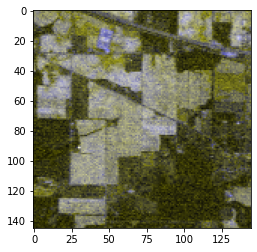

In [4]:
import spectral as sp
view = sp.imshow(indian_pines, (145, 145, 26))

#### "Shape"  is used to show no of elements per axis(Dimensions)

In [5]:
indian_pines.shape

(145, 145, 200)

In [6]:
ground_truth.shape

(145, 145)

In [7]:
indian_pines

array([[[3172, 4142, 4506, ..., 1057, 1020, 1020],
        [2580, 4266, 4502, ..., 1064, 1029, 1020],
        [3687, 4266, 4421, ..., 1061, 1030, 1016],
        ...,
        [2570, 3890, 4320, ..., 1042, 1021, 1015],
        [3170, 4130, 4320, ..., 1054, 1024, 1020],
        [3172, 3890, 4316, ..., 1043, 1034, 1016]],

       [[2576, 4388, 4334, ..., 1047, 1030, 1006],
        [2747, 4264, 4592, ..., 1055, 1039, 1015],
        [2750, 4268, 4423, ..., 1047, 1026, 1015],
        ...,
        [3859, 4512, 4605, ..., 1056, 1035, 1015],
        [3686, 4264, 4690, ..., 1051, 1012, 1020],
        [2744, 4268, 4597, ..., 1047, 1019, 1016]],

       [[2744, 4146, 4416, ..., 1055, 1029, 1025],
        [2576, 4389, 4416, ..., 1051, 1021, 1011],
        [2744, 4273, 4420, ..., 1068, 1033, 1010],
        ...,
        [2570, 4266, 4509, ..., 1051, 1025, 1010],
        [2576, 4262, 4496, ..., 1047, 1029, 1020],
        [2742, 4142, 4230, ..., 1042, 1025, 1011]],

       ...,

       [[3324, 3728, 400

In [8]:
#print(len(indian_pines[0][0]))
#indian_pines[0][0]
len(indian_pines[1][1])

200

#### Image display

ImageView object:
  Display bands       :  (145, 145, 0)
  Interpolation       :  <default>
  RGB data limits     :
    R: [989.0, 1087.0]
    G: [989.0, 1087.0]
    B: [2560.0, 4536.0]

ImageView object:
  Display bands       :  (145, 145, 1)
  Interpolation       :  <default>
  RGB data limits     :
    R: [989.0, 1087.0]
    G: [989.0, 1087.0]
    B: [2709.0, 5744.0]

ImageView object:
  Display bands       :  (145, 145, 2)
  Interpolation       :  <default>
  RGB data limits     :
    R: [989.0, 1087.0]
    G: [989.0, 1087.0]
    B: [3649.0, 6361.0]

ImageView object:
  Display bands       :  (145, 145, 3)
  Interpolation       :  <default>
  RGB data limits     :
    R: [989.0, 1087.0]
    G: [989.0, 1087.0]
    B: [2810.0, 6362.0]

ImageView object:
  Display bands       :  (145, 145, 4)
  Interpolation       :  <default>
  RGB data limits     :
    R: [989.0, 1087.0]
    G: [989.0, 1087.0]
    B: [3840.0, 7153.0]

ImageView object:
  Display bands       :  (145, 145, 5)
  Interp

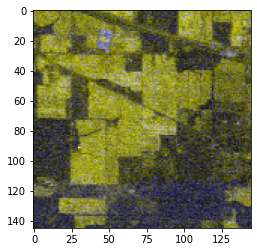

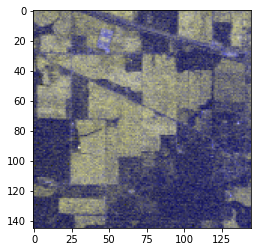

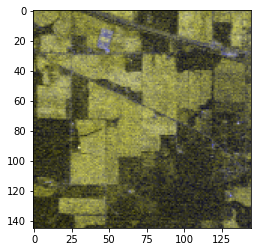

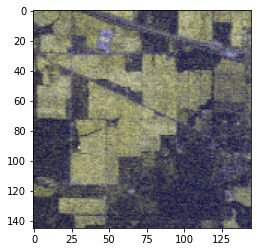

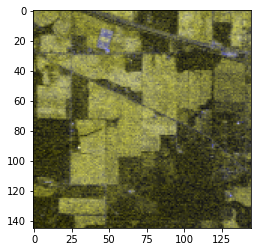

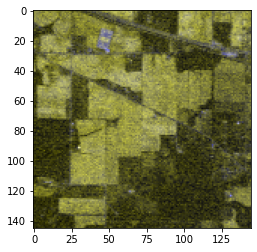

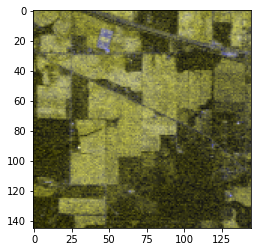

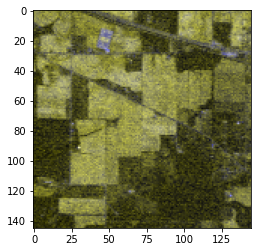

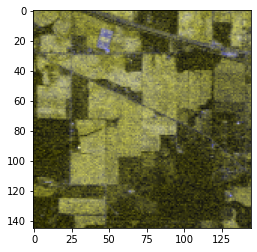

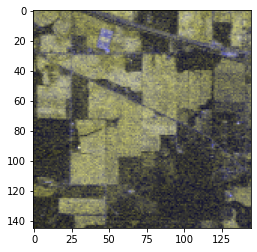

In [9]:
for i in range(10):
    view = sp.imshow(indian_pines, (145, 145, i))
    print(view)

In [10]:
ground_truth.shape

(145, 145)

In [11]:
print(ground_truth)

[[3 3 3 ... 0 0 0]
 [3 3 3 ... 0 0 0]
 [3 3 3 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


ImageView object:
  Display bands       :  [0]
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.0, 16.0]
    G: [0.0, 16.0]
    B: [0.0, 16.0]

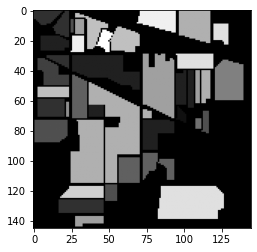

In [12]:
sp.imshow(ground_truth)

#### using "matplotlib"

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


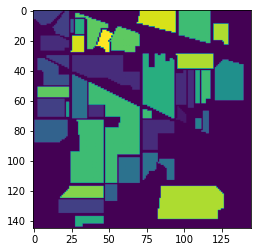

In [13]:
import matplotlib.pyplot as plt
plt.imshow(ground_truth)
print(np.unique(ground_truth)) 

#### Reshaped the dataset arrays and stored in variables

In [14]:
flattened_image = np.reshape(indian_pines,(-1,indian_pines.shape[-1]))
flattened_ground = np.reshape(ground_truth,(-1,))

In [15]:
#len(flattened_image)
len(flattened_ground)


21025

### 1. Principle Component Analysis (PCA)

In [16]:
''' Principal Component Analysis (PCA) is a statistical procedure that uses an orthogonal transformation which converts a set of 
correlated variables to a set of uncorrelated variables. PCA is a most widely used tool in exploratory data analysis and in 
machine learning for predictive models. '''
# https://media.geeksforgeeks.org/wp-content/uploads/m.png

' Principal Component Analysis (PCA) is a statistical procedure that uses an orthogonal transformation which converts a set of \ncorrelated variables to a set of uncorrelated variables. PCA is a most widely used tool in exploratory data analysis and in \nmachine learning for predictive models. '

In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [18]:
pipeline = Pipeline([('scaling', StandardScaler()), ('pca', PCA(n_components=10))])
pca_image = pipeline.fit_transform(flattened_image)

ImageView object:
  Display bands       :  [0]
  Interpolation       :  <default>
  RGB data limits     :
    R: [-40.33227456935652, 44.906256734920206]
    G: [-40.33227456935652, 44.906256734920206]
    B: [-40.33227456935652, 44.906256734920206]

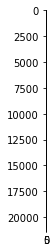

In [19]:
sp.imshow(pca_image)

In [20]:
pca=np.reshape(pca_image,(145,-1,pca_image.shape[-1]))

In [21]:
pca.shape

(145, 145, 10)

ImageView object:
  Display bands       :  [0, 5.0, 9]
  Interpolation       :  <default>
  RGB data limits     :
    R: [-18.19030690280263, 42.382611437013416]
    G: [-5.5453151882459535, 7.89214956671508]
    B: [-3.0217894258364817, 4.675170047419841]

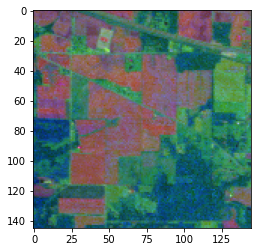

In [22]:
sp.imshow(pca)

### 2. Linear Discriminant Analysis (LDA)

In [23]:
''' Linear discriminant analysis (LDA) is used here to reduce the number of features to a more manageable number before the
process of classification. The linear combinations obtained using Fisher's linear discriminant are called Fisher faces. '''
# https://media.geeksforgeeks.org/wp-content/uploads/20190423132455/ldanewaxis.jpg

" Linear discriminant analysis (LDA) is used here to reduce the number of features to a more manageable number before the\nprocess of classification. The linear combinations obtained using Fisher's linear discriminant are called Fisher faces. "

In [24]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [25]:
lda_pipeline = Pipeline([('scaling', StandardScaler()), ('lda', LinearDiscriminantAnalysis(n_components=10))])
lda_image = lda_pipeline.fit_transform(flattened_image,flattened_ground)

ImageView object:
  Display bands       :  [0]
  Interpolation       :  <default>
  RGB data limits     :
    R: [-16.913792411260136, 13.716170503163465]
    G: [-16.913792411260136, 13.716170503163465]
    B: [-16.913792411260136, 13.716170503163465]

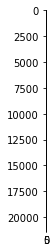

In [26]:
sp.imshow(lda_image)

In [27]:
lda=np.reshape(lda_image,(145,-1,lda_image.shape[-1]))

In [28]:
lda.shape

(145, 145, 10)

ImageView object:
  Display bands       :  [0, 5.0, 9]
  Interpolation       :  <default>
  RGB data limits     :
    R: [-7.008368929097205, 4.446145983002465]
    G: [-5.127859080821916, 7.858276675737068]
    B: [-6.41249931663251, 13.716170503163465]

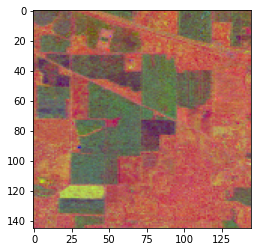

In [29]:
sp.imshow(lda)

### 3. Independent Component Analysis (ICA) 

In [30]:
''' Independent Component Analysis (ICA) is a machine learning technique to separate independent sources from a mixed signal.
Unlike principal component analysis which focuses on maximizing the variance of the data points, the independent component 
analysis focuses on independence, i.e. independent components '''
# https://media.geeksforgeeks.org/wp-content/uploads/20190521012201/ica.jpg

' Independent Component Analysis (ICA) is a machine learning technique to separate independent sources from a mixed signal.\nUnlike principal component analysis which focuses on maximizing the variance of the data points, the independent component \nanalysis focuses on independence, i.e. independent components '

In [31]:
from sklearn.decomposition import FastICA

In [32]:
ica_pipeline = Pipeline([('scaling', StandardScaler()), ('ica', FastICA(n_components=10))])
ica_image = ica_pipeline.fit_transform(flattened_image,flattened_ground)

ImageView object:
  Display bands       :  [0]
  Interpolation       :  <default>
  RGB data limits     :
    R: [-0.06708694008217668, 0.08427211758770567]
    G: [-0.06708694008217668, 0.08427211758770567]
    B: [-0.06708694008217668, 0.08427211758770567]

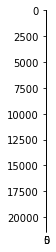

In [33]:
sp.imshow(ica_image)

In [34]:
ica=np.reshape(ica_image,(145,-1,ica_image.shape[-1]))

In [35]:
ica.shape

(145, 145, 10)

ImageView object:
  Display bands       :  [0, 5.0, 9]
  Interpolation       :  <default>
  RGB data limits     :
    R: [-0.02252739185597677, 0.05452359412015509]
    G: [-0.03691730961117354, 0.017605496422574706]
    B: [-0.03215440911676215, 0.02978346974462493]

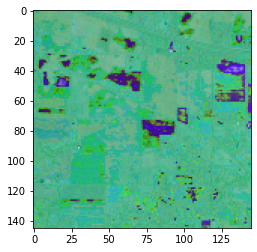

In [36]:
sp.imshow(ica)

In [37]:
norm_flattened = StandardScaler().fit_transform(flattened_image)

In [38]:
def flatten(X):
    if len(X.shape) <= 2:
        X = X
    else:
        X = np.reshape(X,(-1,X.shape[-1]))
    return X

In [39]:
def standard(X):
    from sklearn.preprocessing import StandardScaler
    return StandardScaler().fit_transform(flatten(X))

In [40]:
def unflatten(X,size=145):
    return np.reshape(X,(size,-1,X.shape[-1]))


In [41]:
class VarianceScorer:
    def __init__(self,X_perfect):
        self._original_variance = np.var(standard(X_perfect),axis = 0)
        self._original = flatten(X_perfect)
    
    def score(self,X):
        current_variance = np.var(flatten(X),axis = 0)
        return (sum(current_variance) / sum(self._original_variance))

In [42]:
def neighbour_score(X,mode="prepend"):
    d1 = np.linalg.norm(np.diff(X,axis = 0,prepend = 0),axis = -1)
    d2 = np.linalg.norm(np.flip(np.diff(np.flip(X,axis=0),axis = 0,prepend = 0),axis=0),axis=-1)
    d3 = np.linalg.norm(np.diff(X,axis = 1,prepend = 0),axis=-1)
    d4 = np.linalg.norm(np.flip(np.diff(np.flip(X,axis=1),axis = 1,prepend = 0),axis=1),axis=-1)
    return np.dstack([d1,d2,d3,d4])

In [43]:
class NeighbourhoodScorer:
    def __init__(self,X_perfect):
        self._original_neighbourhood = self._neighbour_score(X_perfect)
        self._original = flatten(X_perfect)
        
    def _neighbour_score(self,X,mode="wrap"):
        if mode == "prepend":
            # Results in ~0.99699-0.99853 for num_components~50-75
            d1 = np.linalg.norm(np.diff(X,axis = 0,prepend = 0),axis = -1)
            d2 = np.linalg.norm(np.flip(np.diff(np.flip(X,axis=0),axis = 0,prepend = 0),axis=0),axis=-1)
            d3 = np.linalg.norm(np.diff(X,axis = 1,prepend = 0),axis=-1)
            d4 = np.linalg.norm(np.flip(np.diff(np.flip(X,axis=1),axis = 1,prepend = 0),axis=1),axis=-1)
        elif mode == "wrap":
            # Results in ~0.99695-0.99852 for num_component~50-75
            d1 = np.linalg.norm(X - np.roll(X,shift=1,axis=0),axis = -1)
            d2 = np.linalg.norm(X - np.roll(X,shift=-1,axis=0),axis = -1)
            d3 = np.linalg.norm(X - np.roll(X,shift=1,axis=1),axis = -1)
            d4 = np.linalg.norm(X - np.roll(X,shift=-1,axis=1),axis = -1)
        return np.dstack([d1,d2,d3,d4])
    
    def score(self,X):
        current_mat = self._neighbour_score(X)
        return 1/(1+np.linalg.norm(current_mat - self._original_neighbourhood)/(current_mat.shape[0]*current_mat.shape[1]))
    
    def score1(self,X):
        current_mat = self._neighbour_score(X)
        scale = np.mean(current_mat,axis=(0,1)) / np.mean(self._original_neighbourhood,axis=(0,1))
        bias = np.mean(self._original_neighbourhood - (current_mat/scale))
        return 1/(1+np.linalg.norm((current_mat/scale) + bias - self._original_neighbourhood)/(current_mat.shape[0]*current_mat.shape[1]))

### Performance

In [44]:
Scorer = VarianceScorer(indian_pines)
pca_vs=Scorer.score(pca_image)
pca_vs

0.9553195514793211

In [45]:
Scorer = VarianceScorer(indian_pines)
lda_vs=Scorer.score(lda_image)
lda_vs

0.08581269403857582

In [46]:
Scorer = VarianceScorer(indian_pines)
ica_vs=Scorer.score(ica_image)
ica_vs

2.3781212842096473e-06

### Time consumption  

In [47]:
%timeit Scorer.score(pca_image)

4.06 ms ± 93.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [48]:
%timeit Scorer.score(lda_image)

3.94 ms ± 59.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [49]:
%timeit Scorer.score(ica_image)

2.22 ms ± 128 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Performance After Error Rate reduction

In [50]:
Scorer1 = NeighbourhoodScorer(unflatten(standard(indian_pines),145))
pca_ns=Scorer1.score1(unflatten(pca_image,145))
pca_ns

0.9809837983464

In [51]:
Scorer1 = NeighbourhoodScorer(unflatten(standard(indian_pines),145))
lda_ns=Scorer1.score1(unflatten(lda_image,145))
lda_ns

0.9615012676824372

In [52]:
Scorer1 = NeighbourhoodScorer(unflatten(standard(indian_pines),145))
ica_ns=Scorer1.score1(unflatten(ica_image,145))
ica_ns

0.9635811552363565

### Time consumption  After Error Rate reduction

In [53]:
%timeit Scorer1.score1(unflatten(pca_image,145))

28.7 ms ± 1.29 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [54]:
%timeit Scorer1.score1(unflatten(lda_image,145))

27.2 ms ± 3.21 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [55]:
%timeit Scorer1.score1(unflatten(ica_image,145))

21 ms ± 1.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


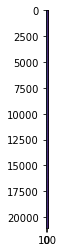

In [56]:
plt.imshow(flattened_image)

#### variance

In [57]:
#variance scores 
print("PCA Variance Score:",pca_vs*100)
print("LDA Variance Score:",lda_vs*100)
print("ICA Variance Score:",ica_vs*100)



PCA Variance Score: 95.53195514793211
LDA Variance Score: 8.581269403857581
ICA Variance Score: 0.00023781212842096473


#### Neighbour hood

In [58]:
#Neighbour hood scores
print("PCA NeighbourHood Score:",pca_ns*100)
print("LDA NeighbourHood Score:",lda_ns*100)
print("ICA NeighbourHood Score:",ica_ns*100)



PCA NeighbourHood Score: 98.09837983464
LDA NeighbourHood Score: 96.15012676824371
ICA NeighbourHood Score: 96.35811552363565


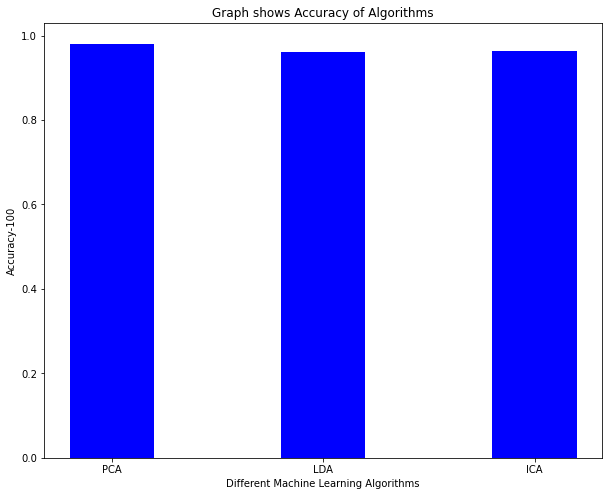

In [59]:
#NeighbourHood Scores are much better than Variance Scores

# creating the dataset
data = {'PCA':pca_ns, 'LDA':lda_ns, 'ICA':ica_ns}

courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 8))

# creating the bar plot
plt.bar(courses, values, color ='blue',width = 0.4)

plt.xlabel("Different Machine Learning Algorithms")
plt.ylabel("Accuracy-100")
plt.title("Graph shows Accuracy of Algorithms")
plt.show()


In [60]:
# From Above graph we came conclude that 
#  PCA is efficient on Indian Pines Dataset